## We will be seeing the Sentiment Fluctuations during the match proceedings by using the Twitter data

The twitter data is collected by filtering the streaming data coming in, by filtering it based on the teams taking part in the match that we are trying to get information from

The time series will be used to view this fluctuations and see if there are any inherent patterns.
Some of the Hypothesis we will be trying to address in this analysis are:
- The normally high sentiment at the start of the match
- The lull between the half time
- The peaks during the entirety of the match, which might be due to a Goal scored, a very bad foul, yellow or red card or an error by the refree
- That there are more peaks or a really high plateau at the end if the match is really exciting
- The more exciting or good a match, the higher the number of peaks

## First, the Arsenal Match

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
tweets_data = []
tweets_file = open('arsenal_only.txt','r')
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [4]:
from textblob import TextBlob
tweet_ds = []

In [5]:
tweet_ds = []
for i in range(len(tweets_data)):
    try:
        if tweets_data[i]['lang'] == 'en':
            tweet_text = tweets_data[i]['text']
            x = TextBlob(tweet_text)
            sentiment = x.sentiment.polarity
            time = tweets_data[i]['created_at'][11:19]
            if sentiment == 0:
                continue
            else:
                tweet_ds.append([time, sentiment])
        else:
            continue
    except KeyError:
        continue

In [6]:
data = pd.DataFrame(tweet_ds)

In [7]:
data = data.rename(columns={0:'time',1:'sentiment'})

In [8]:
data.head()

,time,sentiment
0,12:27:20,0.268182
1,12:27:21,0.500000
2,12:27:21,1.000000
3,12:27:22,0.268182
4,12:27:23,0.268182


In [9]:
data.to_csv('time_series_arsenal.csv')

In [10]:
data = pd.read_csv('time_series.csv', index_col = 'time')

In [11]:
data.index = pd.to_datetime(data.index)

## To much noise

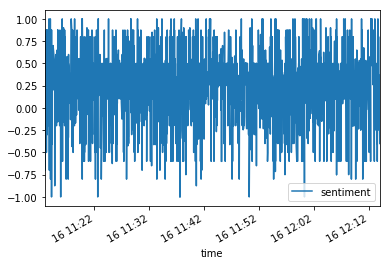

In [14]:
data.plot()

## Trying to decrease the noise by resampling the data on Minutes

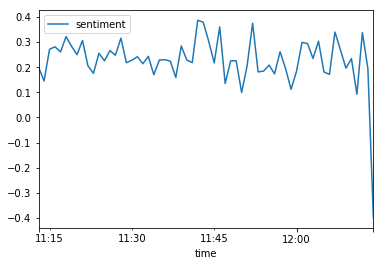

In [12]:
data.resample('T').mean().plot()

## See if we can get more information by resampling on a larger sample, 3 minutes at a time to reduce the noise

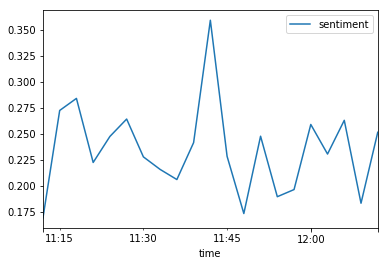

In [13]:
data.resample('3T').mean().plot()

## We will be using Moving averages here

## The Moving averages are a common tool used to get information from Time series of Stocks in Financial Markets

### Moving average with 100 samples(tweets in our case)

In [15]:
data['moving_avg'] = pd.rolling_mean(data['sentiment'], 100)

C:\Users\Gaurav Ahlawat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()
  """Entry point for launching an IPython kernel.


In [16]:
data.head()

,sentiment,moving_avg
time,,
2017-12-16 11:13:00,0.091667,NaN
2017-12-16 11:13:01,-0.700000,NaN
2017-12-16 11:13:05,-0.400000,NaN
2017-12-16 11:13:05,-0.300000,NaN
2017-12-16 11:13:07,0.100000,NaN


## I think Moving Average does provide us a better representation, where the output at each instance is due to the sentiment of all the tweets just before it

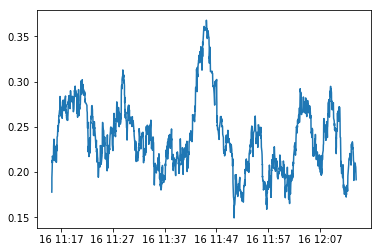

In [17]:
plt.plot(data.moving_avg)

## Let's try with a moving average of about 500 samples to see if we get a smoother curve

In [18]:
data['moving_avg'] = pd.rolling_mean(data['sentiment'], 500)

C:\Users\Gaurav Ahlawat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=500,center=False).mean()
  """Entry point for launching an IPython kernel.


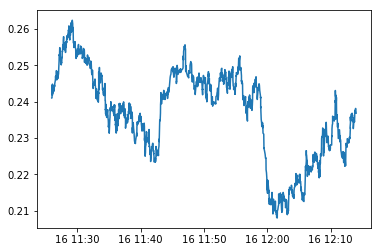

In [19]:
plt.plot(data.moving_avg)

### We get a better understanding of the Sentiment data fluctuation with Moving average

- Like you can see the match started with high sentiment(relatively speaking)
- Then there was a drop in the sentiment, which can be attributed to the performance of the team, as the team conceded a goal
- Then the sentiment kind of plateaued in the match, with sentiment varying only a little
- Then another goal was conceded and you can see that the sentiment went down
- Then the team scored and the sentiment did rally

But the variance of the sentiment is very small

### The lower Moving Average sampling provided a better Time Series plot for analysing the Sentiment Fluctuation

# Let's work with Manchester United's match tweets now

In [20]:
del tweets_data

In [21]:
del tweet_ds

In [22]:
tweets_data = []
tweets_file = open('manu_only.txt','r')
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [23]:
tweet_ds = []
for i in range(len(tweets_data)):
    try:
        if tweets_data[i]['lang'] == 'en':
            tweet_text = tweets_data[i]['text']
            x = TextBlob(tweet_text)
            sentiment = x.sentiment.polarity
            time = tweets_data[i]['created_at'][11:19]
            if sentiment == 0:
                continue
            else:
                tweet_ds.append([time, sentiment])
        else:
            continue
    except KeyError:
        continue

In [24]:
data = pd.DataFrame(tweet_ds)

In [25]:
data = data.rename(columns={0:'time',1:'sentiment'})

In [26]:
data.to_csv('time_series_manu.csv')

In [27]:
data = pd.read_csv('time_series.csv', index_col = 'time')

In [28]:
data.index = pd.to_datetime(data.index)

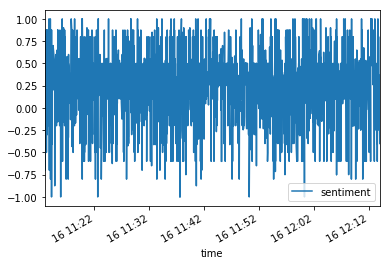

In [29]:
data.plot()

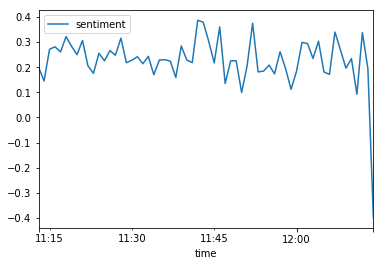

In [30]:
data.resample('T').mean().plot()

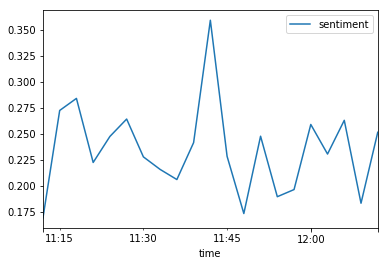

In [31]:
data.resample('3T').mean().plot()

In [32]:
data['moving_avg'] = pd.rolling_mean(data['sentiment'], 100)

C:\Users\Gaurav Ahlawat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=100,center=False).mean()
  """Entry point for launching an IPython kernel.


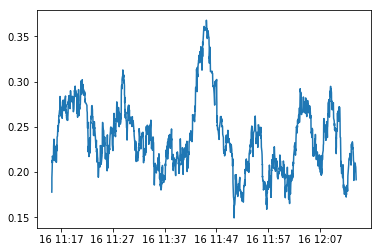

In [33]:
plt.plot(data.moving_avg)

## Again we see that the Moving average gives us a good Time Series Plot